In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('long.csv')
df

,branch,menu,units
0,Bangkok,mocha,365
1,Phuket,mocha,70
2,Pattaya,mocha,350
3,Tak,mocha,450
4,Bangkok,latte,160
5,Phuket,latte,330
6,Pattaya,latte,305
7,Tak,latte,85
8,Bangkok,espresso,435
9,Phuket,espresso,245


In [4]:
df.pivot_table(index='branch', columns='menu', values='units')

menu,espresso,latte,mocha
branch,,,
Bangkok,435.0,160.0,365.0
Pattaya,160.0,305.0,350.0
Phuket,245.0,330.0,70.0
Tak,80.0,85.0,450.0


In [5]:
df.pivot_table(index='menu', columns='branch', values='units')

branch,Bangkok,Pattaya,Phuket,Tak
menu,,,,
espresso,435.0,160.0,245.0,80.0
latte,160.0,305.0,330.0,85.0
mocha,365.0,350.0,70.0,450.0


## Multi IDs

In [7]:
df2 = pd.read_csv('long2.csv')
df2

,branch,period,menu,units
0,Bangkok,2015,mocha,215
1,Phuket,2015,mocha,280
2,Pattaya,2015,mocha,265
3,Tak,2015,mocha,355
4,Bangkok,2016,mocha,480
5,Phuket,2016,mocha,155
6,Pattaya,2016,mocha,225
7,Tak,2016,mocha,425
8,Bangkok,2017,mocha,410
9,Phuket,2017,mocha,175


In [10]:
df2.pivot_table(index=['branch','period'], columns='menu', values='units')

menu            espresso  latte  mocha
branch  period                        
Bangkok 2015       455.0  390.0  215.0
        2016       140.0  115.0  480.0
        2017       190.0  300.0  410.0
Pattaya 2015       355.0  400.0  265.0
        2016       250.0  435.0  225.0
        2017       360.0  425.0  140.0
Phuket  2015       490.0  475.0  280.0
        2016        30.0  450.0  155.0
        2017       380.0  320.0  175.0
Tak     2015       320.0  340.0  355.0
        2016       235.0  365.0  425.0
        2017       135.0  165.0  240.0

In [11]:
df3 = df2.pivot_table(index=['branch','period'], columns='menu', values='units')
df3

menu            espresso  latte  mocha
branch  period                        
Bangkok 2015       455.0  390.0  215.0
        2016       140.0  115.0  480.0
        2017       190.0  300.0  410.0
Pattaya 2015       355.0  400.0  265.0
        2016       250.0  435.0  225.0
        2017       360.0  425.0  140.0
Phuket  2015       490.0  475.0  280.0
        2016        30.0  450.0  155.0
        2017       380.0  320.0  175.0
Tak     2015       320.0  340.0  355.0
        2016       235.0  365.0  425.0
        2017       135.0  165.0  240.0

In [12]:
df3.groupby('branch').describe()

menu    espresso                                                             \
           count        mean         std    min    25%    50%    75%    max   
branch                                                                        
Bangkok      3.0  261.666667  169.287724  140.0  165.0  190.0  322.5  455.0   
Pattaya      3.0  321.666667   62.115484  250.0  302.5  355.0  357.5  360.0   
Phuket       3.0  300.000000  240.208243   30.0  205.0  380.0  435.0  490.0   
Tak          3.0  230.000000   92.601296  135.0  185.0  235.0  277.5  320.0   

menu    latte              ...               mocha                          \
        count        mean  ...    75%    max count        mean         std   
branch                     ...                                               
Bangkok   3.0  268.333333  ...  345.0  390.0   3.0  368.333333  137.325647   
Pattaya   3.0  420.000000  ...  430.0  435.0   3.0  210.000000   63.835727   
Phuket    3.0  415.000000  ...  462.5  475.0   3.0  203.333333   67.144124   
Tak       3.0  290.000000  ...  352.5  365.0   3.0  340.000000   93.407708   

menu                                        
           min    25%    50%    75%    max  
branch                                      
Bangkok  215.0  312.5  410.0  445.0  480.0  
Pattaya  140.0  182.5  225.0  245.0  265.0  
Phuket   155.0  165.0  175.0  227.5  280.0  
Tak      240.0  297.5  355.0  390.0  425.0  

[4 rows x 24 columns]

In [16]:
df3.groupby('branch').agg(['min','max']).T

branch        Bangkok  Pattaya  Phuket    Tak
menu                                         
espresso min    140.0    250.0    30.0  135.0
         max    455.0    360.0   490.0  320.0
latte    min    115.0    400.0   320.0  165.0
         max    390.0    435.0   475.0  365.0
mocha    min    215.0    140.0   155.0  240.0
         max    480.0    265.0   280.0  425.0

branch
Bangkok    Axes(0.125,0.11;0.775x0.77)
Pattaya    Axes(0.125,0.11;0.775x0.77)
Phuket     Axes(0.125,0.11;0.775x0.77)
Tak        Axes(0.125,0.11;0.775x0.77)
dtype: object

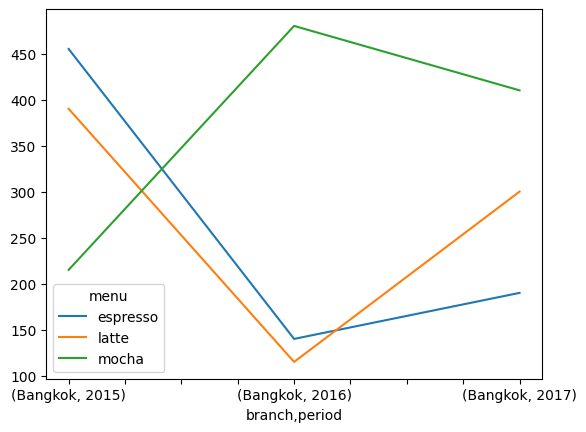

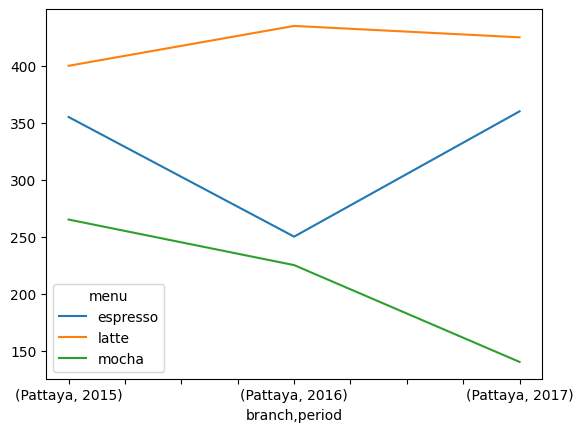

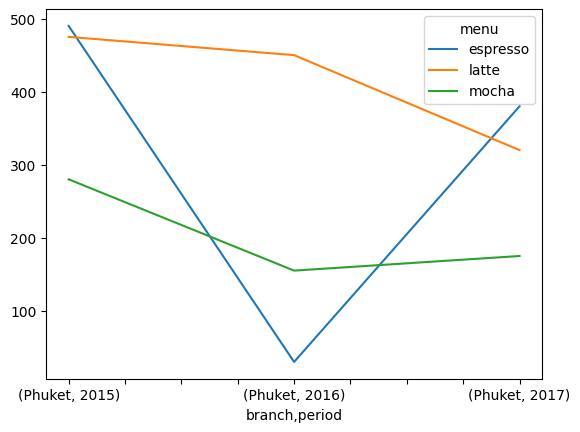

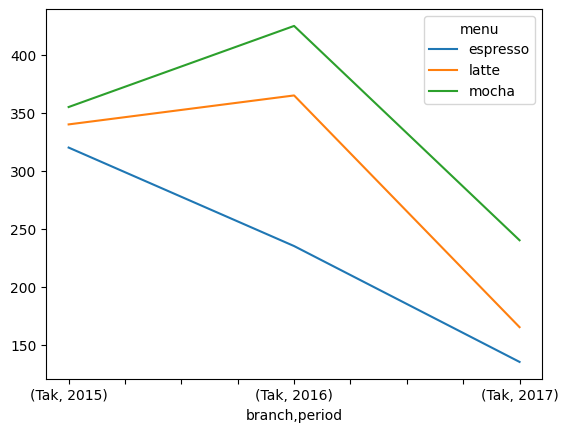

In [19]:
df3.groupby('branch').plot()

period
2015    Axes(0.125,0.11;0.775x0.77)
2016    Axes(0.125,0.11;0.775x0.77)
2017    Axes(0.125,0.11;0.775x0.77)
dtype: object

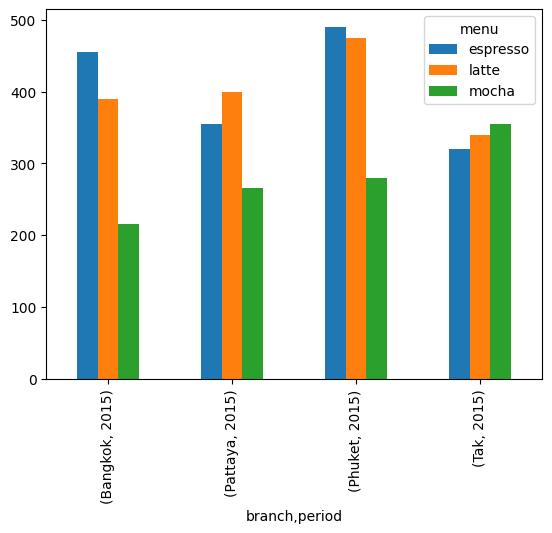

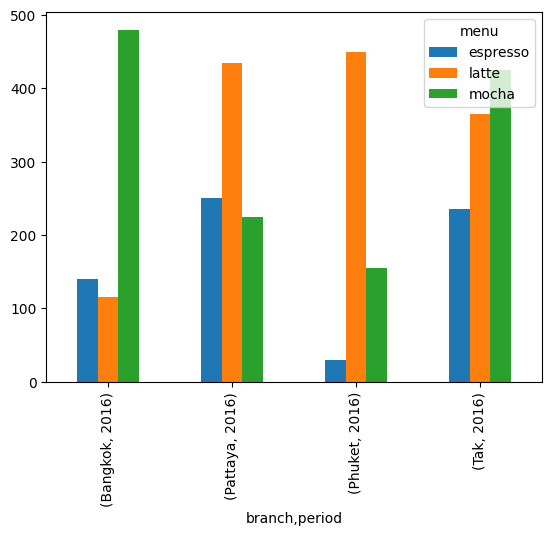

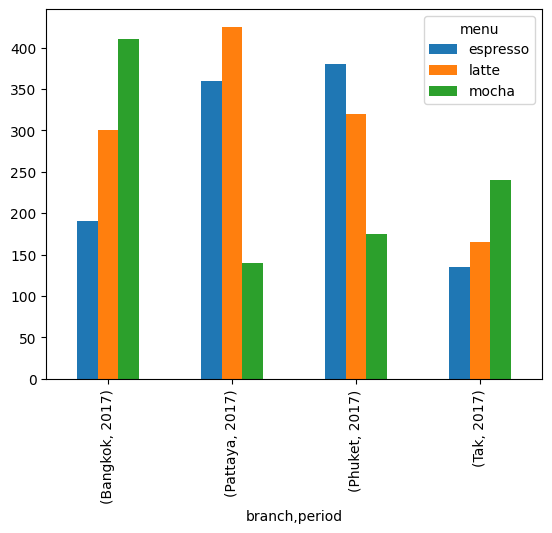

In [22]:
df3.groupby('period').plot(kind='bar')

In [ ]:
df3.groupby('period')